# OrthoDB fasta files per species

**20200701**  
Could only download entire odb10 gene file -> https://v100.orthodb.org/download/odb10_all_fasta.tab.gz  

Want to extract all genes from species within taxonomy of interest. Preferably, create files for each species and then combine these, as this would allow for re-combining in different ways if desired.

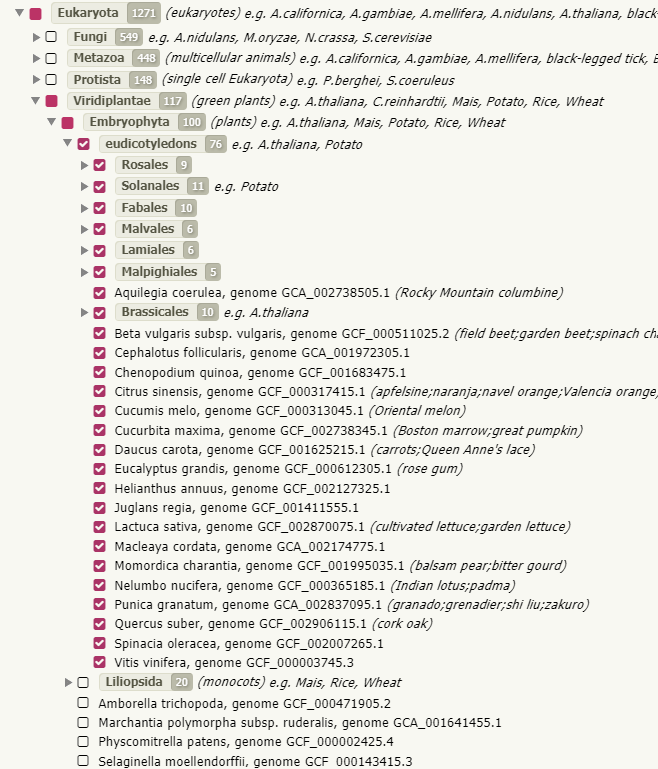

The eudicotyledons are my primary goal, but I would like to keep all of embryophata (aka the mais/rice/wheat ones too). I don't need all of viridiplantae, as it also includes green algae.

In [1]:
import os
import pandas as pd

In [2]:
infn_taxids = '/home/jemimah/databases/orthodb/Embryophyta_taxid_table.tab'
df_taxids = pd.read_csv(infn_taxids, sep='\t')
df_taxids.set_index("name", inplace=True)
df_taxids.head()

,taxid,clade
name,,
Beta_vulgaris_subsp._vulgaris,3555,eudicotyledons
Cephalotus_follicularis,3775,eudicotyledons
Chenopodium_quinoa,63459,eudicotyledons
Citrus_sinensis,2711,eudicotyledons
Cucumis_melo,3656,eudicotyledons


In [3]:
infn_odbids = '/home/jemimah/databases/orthodb/odb10_species.tab'
header = ["taxid", "odbid", "name", "genome", "clustered_genes", "OGs", "mapping"] #see README for more detail
df_odbids = pd.read_csv(infn_odbids, sep='\t', header= None, names = header)
df_odbids.head()

,taxid,odbid,name,genome,clustered_genes,OGs,mapping
0,9,9_0,Buchnera aphidicola,GCF_900128725.1,362.0,2125.0,C
1,48,48_0,Archangium gephyra,GCF_001027285.1,8896.0,16694.0,C
2,52,52_0,Chondromyces crocatus,GCF_001189295.1,7342.0,14649.0,C
3,69,69_0,Lysobacter enzymogenes,GCF_001442515.1,4418.0,21142.0,C
4,192,192_0,Azospirillum brasilense,GCF_001315015.1,5337.0,23025.0,C


In [4]:
taxid_l = list(df_taxids["taxid"])
odbid_l = []
for ids in taxid_l:
    temp = df_odbids[df_odbids["taxid"] == ids]["odbid"]
    odbid_l += list(temp)

df_taxids["odbid"] = odbid_l
df_taxids.head()

,taxid,clade,odbid
name,,,
Beta_vulgaris_subsp._vulgaris,3555,eudicotyledons,3555_0
Cephalotus_follicularis,3775,eudicotyledons,3775_0
Chenopodium_quinoa,63459,eudicotyledons,63459_0
Citrus_sinensis,2711,eudicotyledons,2711_0
Cucumis_melo,3656,eudicotyledons,3656_0


Code to get the full fasta name + code for a specified header  
In the headers, it should go taxid:geneid

In [5]:
%%bash
cd ~/databases/orthodb/
grep -A 1 ">1000373_0:000000" odb10_all_fasta.tab 

>1000373_0:000000	1000373_0
MLSQRQLHNQRAYQANKQRIDLADANLLDKWPRAYQCMEVKRRCVDGRGETLGADETDRAWVPIMTPPDIEEPEDGEHPYKLKLDGRGYNGMPWLELAGQQYRSVTRNIDAKLVNTNLAHLIRPRILGSGADGAMTISIASRVTVSVTGIDLHQPVVGEYIRHNTVYITSCIPTVVKEKLADDLVSELFPTDTGGMMWHLVSGLVQAMATGQLVQRSGRYYSQVTGVSVANSHITDVSTLNVSRITRGSGILASERMSRRTVRSTFQPSTSKYMVVKRYDEVAKAVMTIKRLYPEISAQWARYDVDFDCGSVAISANEDIFVRALARLLGSVDEREMVLSCLMQNVLAYYKVEPLSTEGLLEDVNRHLYYPATEEYGEHFLQECDDSVTVASVMEIVAAQILTAEVTLTRATNAVNELVPGEQYCYKKYLDNLRQSMDDTCTRGGRADMPGVPLDLYSICTTAVNFEDTMTDYYSDFSYWAIPLHITGNADAKIRAGYRSTKEVVTSTNPAYVSLRTMIEANRVDVAAHASEISSENSEKEFEVADGEIISLKDAMMPRPTLGALARSIHWADKLSWFDPGVEGHCRIINGRLEAAAYDAVAIASHLKMAKLELAVDSGHKLGVVSNRHEYSFYTRSTKQYSLPIYESADRVFLHNGRANINNLMTWACQQTKSIPGHVVNLRFAVRLVGLNVASGIVRDLRTQADIRDERDTRLIAGCTLSPQVIGLCDAGMKDIVSHARVAIGRLINGVNVSTRGLRTRRFTMQRILEYKNGKVYWPRMLCELGQNVYTTVAQARSWGMVIPAKIFAMLNSTATDHHWEESVELQQAGVTLNVLLTAQHLLTKSPKEAGDAGEIMAWFSALGLLSTLAKLVAVNSSNVNYGSSLPTAIGFLGSLTCTMDASTDGLAMWIATLAAQEAMGITGRPRLAATVVANSLGWYNAMTTAPTGTDFGPLVNDMIKDCFTVTEMRIC

In [6]:
#%%bash
#cd ~/databases/orthodb/
#grep -A 1 ">3555_0" odb10_all_fasta.tab > Beta_vulgaris_subsp._vulgaris.fasta

So now what I want to do is some automating: for every row in the dataframe a) create a file named the clade if it doesnt already exist, b) grep with the >+odbid c) save as name.fasta

In [7]:
#couldnt make work
#%%bash
#cd ~/databases/orthodb/

#for x in #sample
#do 
#mkdir -p #clade
#grep -A 1 #odbid odb10_all_fasta.tab > #clade/#name.fasta
#done

In [8]:
temp = df_taxids.head()
temp

,taxid,clade,odbid
name,,,
Beta_vulgaris_subsp._vulgaris,3555,eudicotyledons,3555_0
Cephalotus_follicularis,3775,eudicotyledons,3775_0
Chenopodium_quinoa,63459,eudicotyledons,63459_0
Citrus_sinensis,2711,eudicotyledons,2711_0
Cucumis_melo,3656,eudicotyledons,3656_0


In [9]:
#i = 0
#for x in df_taxids.index:
#    clade = "~/databases/orthodb/" + df_taxids.at[x, "clade"]
#    odbid = ">" + df_taxids.at[x, "odbid"]
#    name = str(x)
#    print(i, name)
#    i += 1
#    !echo {name}
##    !echo "{odbid}"
##    !echo {clade}/{name}.fasta
#    !mkdir -p {clade} && grep -A 1 "{odbid}" ~/databases/orthodb/odb10_all_fasta.tab > {clade}/{name}.fasta


0 Beta_vulgaris_subsp._vulgaris
Beta_vulgaris_subsp._vulgaris
1 Cephalotus_follicularis
Cephalotus_follicularis
2 Chenopodium_quinoa
Chenopodium_quinoa
3 Citrus_sinensis
Citrus_sinensis
4 Cucumis_melo
Cucumis_melo
5 Cucurbita_maxima
Cucurbita_maxima
6 Daucus_carota
Daucus_carota
7 Eucalyptus_grandis
Eucalyptus_grandis
8 Helianthus_annuus
Helianthus_annuus
9 Juglans_regia
Juglans_regia
10 Lactuca_sativa
Lactuca_sativa
11 Macleaya_cordata
Macleaya_cordata
12 Momordica_charantia
Momordica_charantia
13 Nelumbo_nucifera
Nelumbo_nucifera
14 Punica_granatum
Punica_granatum
15 Quercus_suber
Quercus_suber
16 Spinacia_oleracea
Spinacia_oleracea
17 Vitis_vinifera
Vitis_vinifera
18 Aquilegia_coerulea
Aquilegia_coerulea
19 Arabidopsis_lyrata_subsp._lyrata
Arabidopsis_lyrata_subsp._lyrata
20 Arabidopsis_thaliana
Arabidopsis_thaliana
21 Arabis_alpina
Arabis_alpina
22 Brassica_rapa
Brassica_rapa
23 Camelina_sativa
Camelina_sativa
24 Capsella_rubella
Capsella_rubella
25 Carica_papaya
Carica_papaya
26 E

Figured out that it wasnt working because without "" around the {odbid} the > was being confused, and it didn't matter if I put the "" in the python, they needed to be explicite in bash.